In [47]:
#https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021
#https://www.kaggle.com/tanuprabhu/population-by-country-2020

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [48]:

# Exploring the dataset
df=pd.read_csv('world-happiness-report-2021.csv')
pop = pd.read_csv('population_by_country_2020.csv')
print(df.head(3))
print(df.shape)
print(df.info())

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919    

In [49]:
print(pop.head(3))
print(pop.shape)
print(pop.info())

  Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                   China         1440297825        0.39 %     5540090   
1                   India         1382345085        0.99 %    13586631   
2           United States          331341050        0.59 %     1937734   

   Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0              153          9388211       -348399.0        1.7       38   
1              464          2973190       -532687.0        2.2       28   
2               36          9147420        954806.0        1.8       38   

  Urban Pop % World Share  
0        61 %     18.47 %  
1        35 %     17.70 %  
2        83 %      4.25 %  
(235, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Populati

In [50]:
pop_1 = pop.iloc[:,:2] #only want population column
pop_df = pd.merge(df, pop_1, how='left', left_on='Country name', right_on='Country (or dependency)')
pop_df_alter = pop_df.drop(columns='Country (or dependency)')

df1=pop_df_alter.sort_values('Country name', ascending = True).reset_index(drop=True)
df1.rename(columns={'Country name':'Country_Name',
                     'Regional indicator':'Regional_Indicator',
                    'Ladder score':'Ladder_Score',
                    'Standard error of ladder score':'Standard_Error_Ladder_Score',
                    'upperwhisker':'Upper_Whisker',
                    'lowerwhisker':'Lower_Whisker',
                    'Logged GDP per capita':'Logged_GDPper_Capita',
                    'Social support':'Social_Support',
                    'Healthy life expectancy':'Healthy_Life_Expectancy',
                    'Freedom to make life choices':'Freedom_Make_Life_Choices',
                    'Perceptions of corruption':'Perceptions_Corruption',
                    'Ladder score in Dystopia':'Ladder_Score_Dystopia',
                    'Explained by: Log GDP per capita':'E_Log_GDPper_Capita',
                    'Explained by: Social support':'E_Social_Support',
                    'Explained by: Healthy life expectancy':'E_Healthy_Life_Expectancy',
                    'Explained by: Freedom to make life choices':'E_Freedom_Make_Life_Choices',
                    'Explained by: Generosity':'E_Generosity',
                    'Explained by: Perceptions of corruption':'E_Perceptions_Corruption',
                    'Dystopia + residual':'Dystopia_Residual',
                    'Population (2020)':'Pop_2020'},inplace=True)

In [51]:
# Check if changes worked properly
print(df1.isnull().sum())
df1.dropna(subset = ['Pop_2020'], inplace=True)
print(df1.head(2))
print(df1.shape)

Country_Name                   0
Regional_Indicator             0
Ladder_Score                   0
Standard_Error_Ladder_Score    0
Upper_Whisker                  0
Lower_Whisker                  0
Logged_GDPper_Capita           0
Social_Support                 0
Healthy_Life_Expectancy        0
Freedom_Make_Life_Choices      0
Generosity                     0
Perceptions_Corruption         0
Ladder_Score_Dystopia          0
E_Log_GDPper_Capita            0
E_Social_Support               0
E_Healthy_Life_Expectancy      0
E_Freedom_Make_Life_Choices    0
E_Generosity                   0
E_Perceptions_Corruption       0
Dystopia_Residual              0
Pop_2020                       9
dtype: int64
  Country_Name          Regional_Indicator  Ladder_Score  \
0  Afghanistan                  South Asia         2.523   
1      Albania  Central and Eastern Europe         5.117   

   Standard_Error_Ladder_Score  Upper_Whisker  Lower_Whisker  \
0                        0.038          2.596    

In [52]:
# Assigning defined categories based on reported ladder score
df1['Ladder_Category'] = None
for idx, row in df1.iterrows():
        if row['Ladder_Score'] <= 3.333:
                df1.loc[idx, 'Ladder_Category'] = 'Suffering'
        elif row['Ladder_Score'] <=6.666:
                df1.loc[idx, 'Ladder_Category'] = 'Struggling'
        else:
                df1.loc[idx, 'Ladder_Category'] = 'Thriving'

In [53]:
# Analysis of data
print(df1.value_counts(['Regional_Indicator','Ladder_Category']).sort_index())

Regional_Indicator                  Ladder_Category
Central and Eastern Europe          Struggling         15
Commonwealth of Independent States  Struggling         12
East Asia                           Struggling          4
Latin America and Caribbean         Struggling         19
                                    Thriving            1
Middle East and North Africa        Struggling         15
                                    Thriving            1
North America and ANZ               Thriving            4
South Asia                          Struggling          6
                                    Suffering           1
Southeast Asia                      Struggling          9
Sub-Saharan Africa                  Struggling         32
                                    Suffering           1
Western Europe                      Struggling          6
                                    Thriving           14
dtype: int64


In [54]:
# Analysis of various factors across the Regions
def RegCalc(column):
        return(df1.groupby('Regional_Indicator', as_index=False).agg({column:['min','max','mean']}).round(3))

def CountryCalc(column):
        var=df.iloc[df1[column].idxmax()]
        var1=df.iloc[df1[column].idxmin()]
        return(var[0] +' scored highest in '+ column +' while '+ var1[0] +' scored lowest in '+ column)


df_calc = df1.iloc[:,[2,6,7,8,9,10,11]]

for x in df_calc:
        print(RegCalc(x))

                   Regional_Indicator Ladder_Score              
                                               min    max   mean
0          Central and Eastern Europe        5.101  6.461  5.894
1  Commonwealth of Independent States        4.875  6.179  5.467
2                           East Asia        5.339  5.940  5.700
3         Latin America and Caribbean        3.615  7.069  5.908
4        Middle East and North Africa        3.658  7.157  5.264
5               North America and ANZ        6.951  7.277  7.128
6                          South Asia        2.523  5.269  4.442
7                      Southeast Asia        4.426  6.377  5.408
8                  Sub-Saharan Africa        3.145  6.049  4.450
9                      Western Europe        5.723  7.842  6.984
                   Regional_Indicator Logged_GDPper_Capita                
                                                       min     max    mean
0          Central and Eastern Europe                9.520  10.529  10

In [57]:
world_columns = ['GDP per Capita','Social support','Life expectancy','Freedom',
                 'Generosity','Perceptions of corruption','Ladder score']

df_1 = df1.iloc[:,6:12]
df_2 = df1.iloc[:,2:3]
df_corr = pd.concat([df_1 , df_2], axis=1)

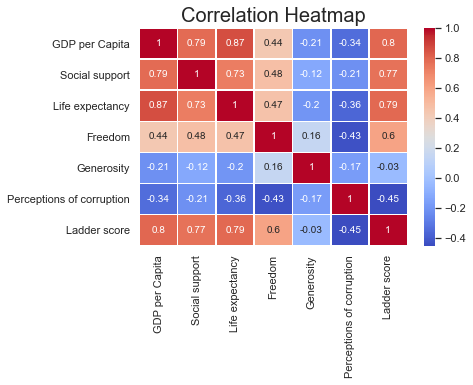

In [58]:
# Visualising the data
# Examining correlation between factors

sns.heatmap(df_corr.corr(),annot=True,linewidths=.5,cmap='coolwarm',
        xticklabels=world_columns, yticklabels=world_columns)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.title('Correlation Heatmap', fontsize =20)
plt.savefig('Heatmap.png')
plt.show()

In [59]:
# Boxplots comparing Regions across multiple variables
def reg_dist(column):
    g=sns.catplot(x=column,  y='Regional_Indicator', data=df1,kind='box',palette='husl',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                      'markersize':'5'})
    g.fig.set_size_inches(12,6)
    g.fig.suptitle('Comparing distribution by Region',weight='bold')
    g.set(xlabel=column,ylabel='Region')
    plt.tight_layout()
    plt.show()

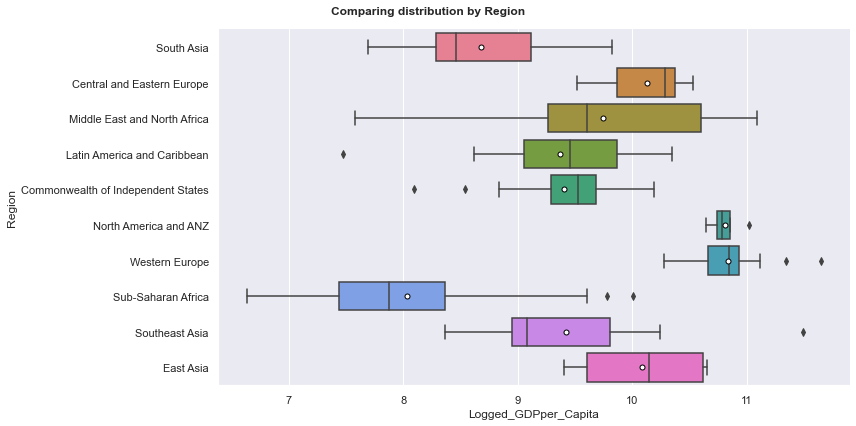

None


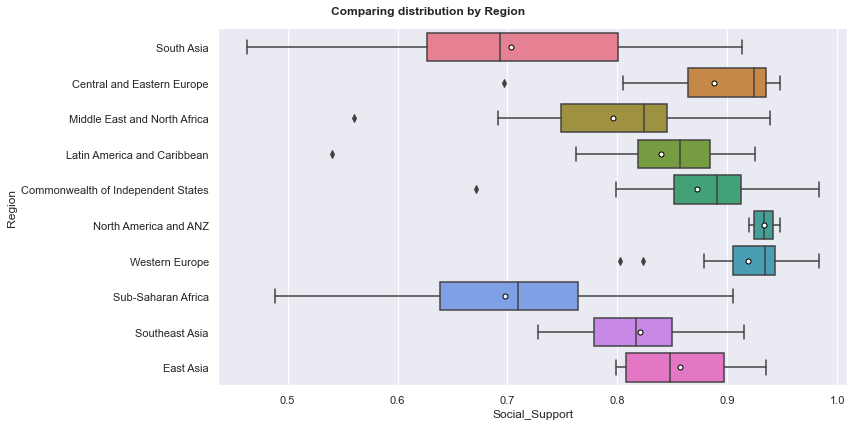

None


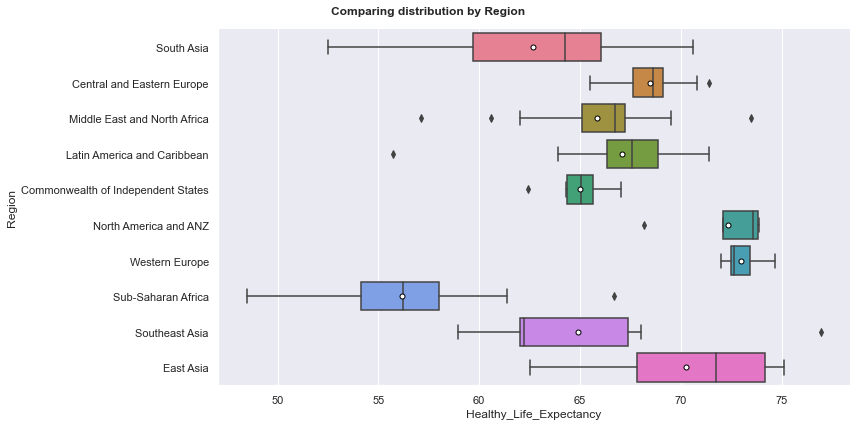

None


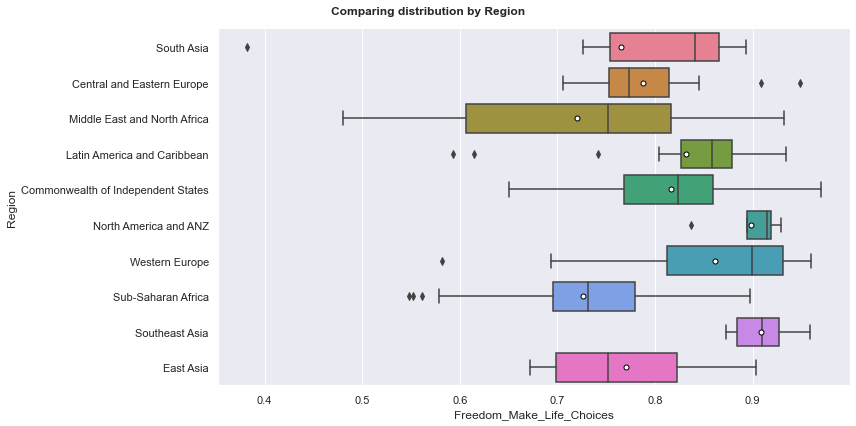

None


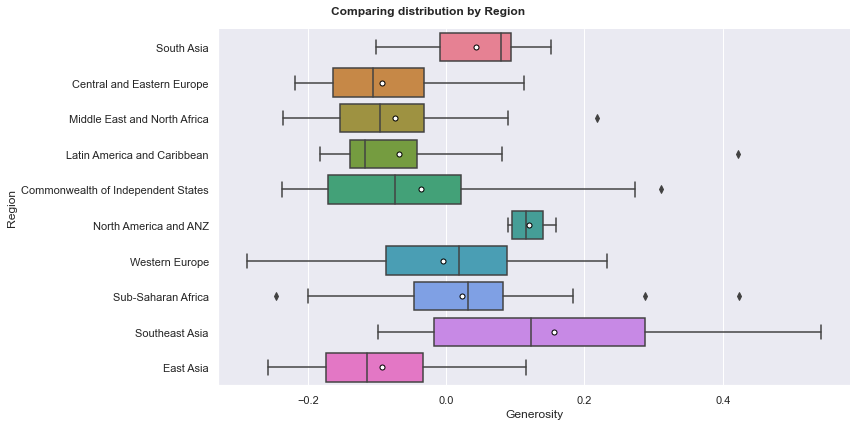

None


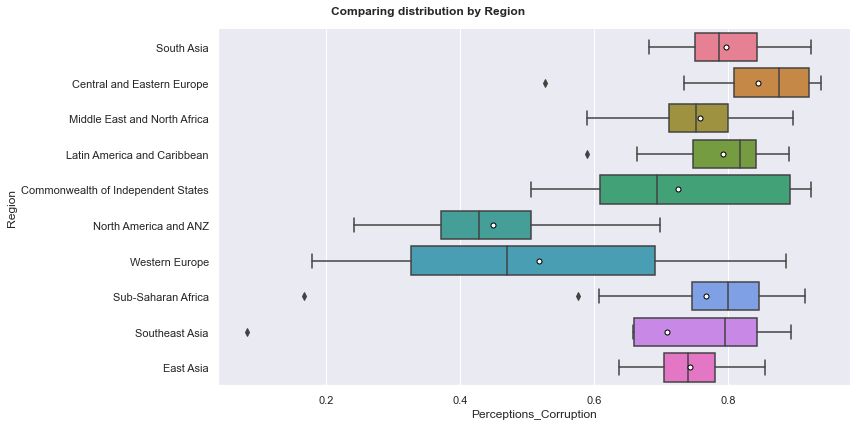

None


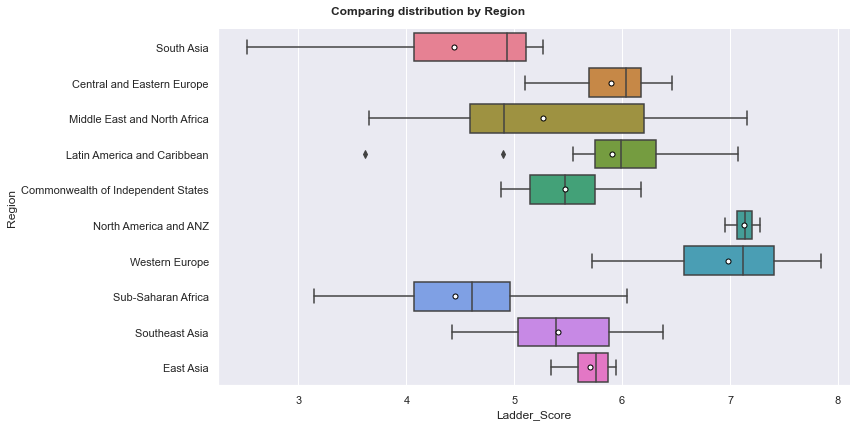

None


In [60]:
 for x in df_corr:
        print(reg_dist(x))

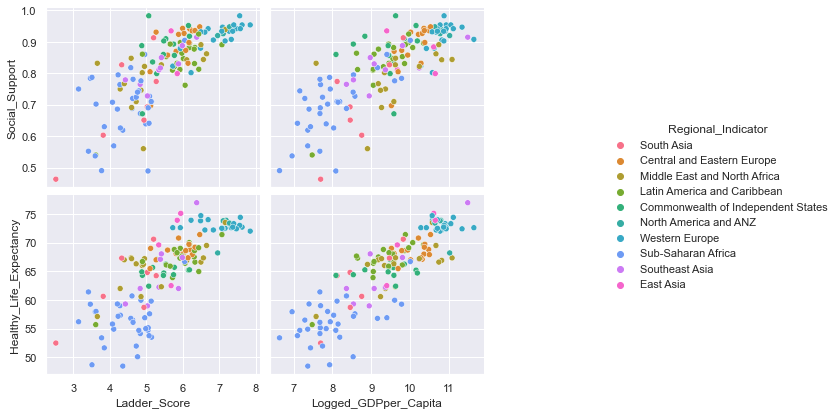

In [61]:
# Scatter plot examining the relationship between Ladder_score(Happiness), GDP, Life expectancy, and Social Support
sns.set()  
pair_g=sns.pairplot(data=df1, x_vars=['Ladder_Score', 'Logged_GDPper_Capita']
            ,y_vars=['Social_Support', 'Healthy_Life_Expectancy']
            ,hue='Regional_Indicator',palette='husl',diag_kind=None)
pair_g.fig.set_size_inches(12,6)


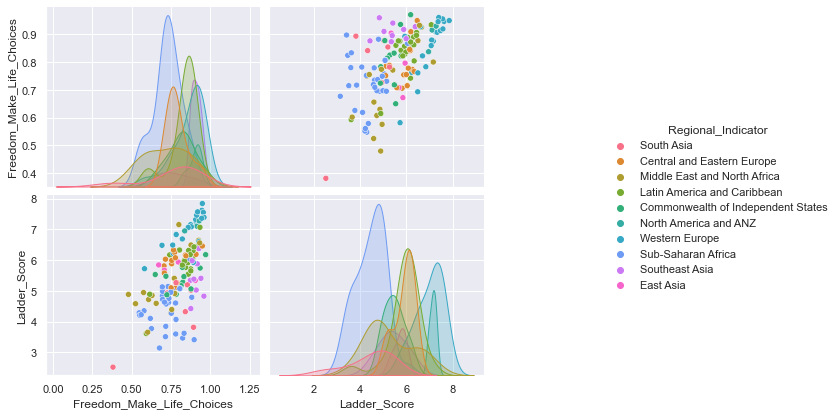

In [63]:
# Plotting the relationship between Freedom to make life choices and Happiness
sns.set()
g=sns.pairplot(data=df1,
             vars=['Freedom_Make_Life_Choices', 'Ladder_Score'],
             kind='scatter',
             palette='husl',
             diag_kind ='kde',
             hue='Regional_Indicator')   
g.fig.set_size_inches(12,6)    
plt.show()


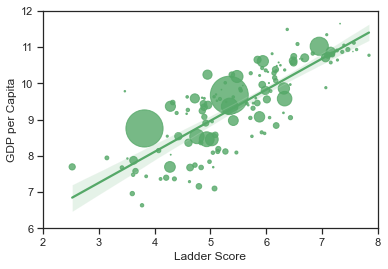

In [64]:
# Plotting the relationship between GDP and Happiness
sns.set_style('ticks')
df1['Pop_2020'] = df1['Pop_2020'].div(1000000)
l_gdp=sns.regplot(x='Ladder_Score',y='Logged_GDPper_Capita',data=df1,
            scatter_kws={'s': df1['Pop_2020'],'color':'g','alpha':0.8},
            line_kws={'color':'g'})
l_gdp.set(xlabel='Ladder Score', ylabel='GDP per Capita',xlim=(2,8),ylim=(6,12))
plt.show()